In [2]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

from xgboost import XGBClassifier
import matplotlib.pyplot as plt


In [3]:

df = pd.read_csv("../data/churn_data.csv")

X = df.drop(columns=['customer_id','churn','total_charges'])
y = df['churn']


X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data ready for training")


✅ Data ready for training


In [4]:

model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)


model.fit(X_train, y_train)
print("✅ Model trained successfully")


✅ Model trained successfully


C:\Users\Dell\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:199: UserWarning: [21:02:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [5]:

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]  # probability of churn

print("✅ Predictions complete")


✅ Predictions complete


In [6]:

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc*100,2), "%")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))


roc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", round(roc,3))


Accuracy: 97.0 %

Confusion Matrix:
 [[281  10]
 [  2 107]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       291
           1       0.91      0.98      0.95       109

    accuracy                           0.97       400
   macro avg       0.95      0.97      0.96       400
weighted avg       0.97      0.97      0.97       400

ROC-AUC Score: 0.992


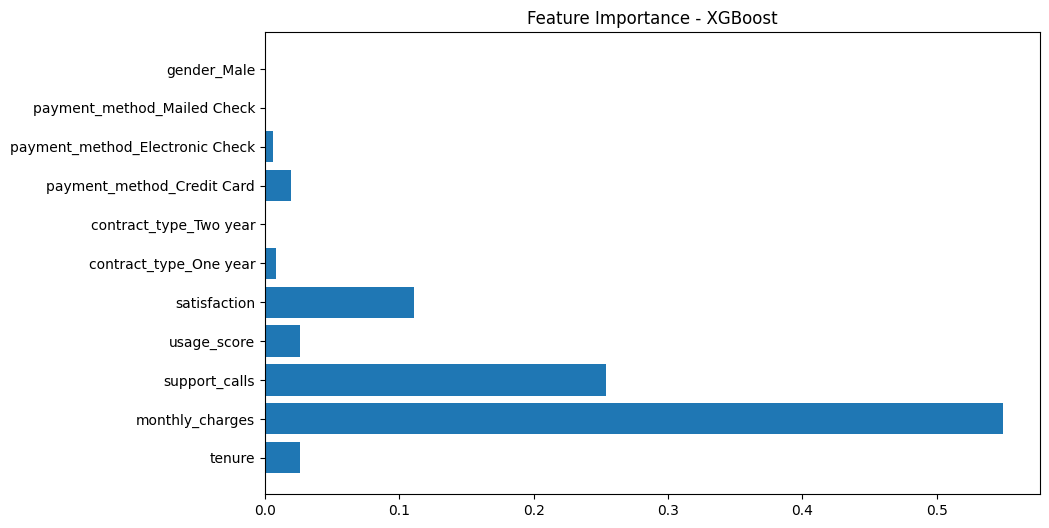

In [7]:

importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, importance)
plt.title("Feature Importance - XGBoost")
plt.show()
